# Modeling
In this notebook, we'll be modeling the data we've previously prepared. Out notebook will be laid out as follows:

1. Model Selection & Generation
2. Hyperparameter Optimization
3. Fine-Tuning (if needed)
4. Reporting Best Model(s) + Settings
5. Interpretation
6. Conclusion

Our eventual goal here is two-fold:

1. Accurately [and fairly] model the diabetes dataset
2. Interpret the results to find something worth recommending to those wanting to reduce risk of diabetes. This can be via LIME/SHAP (i.e. some interpretable model that approximates the neural network) or via analyzing a more simple model's structure (i.e. regression coefficients, random forest decision boundaries)

In [1]:
# Environment Setup
from utils.model import *
from utils.dataset import *

***
## Model Selection & Generation

<Train-Test Split Report>
Train: 202944 obs, 170962 no diabetes [0], 3705 pre-diabetes [1], 28277 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]


100%|██████████| 3171/3171 [00:11<00:00, 281.69it/s]


Epoch 1/50, Loss: 0.6509, Test Loss: 0.7890


100%|██████████| 3171/3171 [00:11<00:00, 283.21it/s]


Epoch 2/50, Loss: 0.4797, Test Loss: 0.7718


100%|██████████| 3171/3171 [00:11<00:00, 283.02it/s]


Epoch 3/50, Loss: 0.4583, Test Loss: 0.7681


100%|██████████| 3171/3171 [00:11<00:00, 282.73it/s]


Epoch 4/50, Loss: 0.4500, Test Loss: 0.7328


100%|██████████| 3171/3171 [00:11<00:00, 283.15it/s]


Epoch 5/50, Loss: 0.4431, Test Loss: 0.7248


100%|██████████| 3171/3171 [00:11<00:00, 284.57it/s]


Epoch 6/50, Loss: 0.4389, Test Loss: 0.7097


100%|██████████| 3171/3171 [00:11<00:00, 283.45it/s]


Epoch 7/50, Loss: 0.4383, Test Loss: 0.7002


100%|██████████| 3171/3171 [00:11<00:00, 283.40it/s]


Epoch 8/50, Loss: 0.4351, Test Loss: 0.6810


100%|██████████| 3171/3171 [00:11<00:00, 283.62it/s]


Epoch 9/50, Loss: 0.4345, Test Loss: 0.6703


100%|██████████| 3171/3171 [00:11<00:00, 283.46it/s]


Epoch 10/50, Loss: 0.4327, Test Loss: 0.6548


100%|██████████| 3171/3171 [00:11<00:00, 284.16it/s]


Epoch 11/50, Loss: 0.4315, Test Loss: 0.6518


100%|██████████| 3171/3171 [00:11<00:00, 283.80it/s]


Epoch 12/50, Loss: 0.4311, Test Loss: 0.6422


100%|██████████| 3171/3171 [00:11<00:00, 284.56it/s]


Epoch 13/50, Loss: 0.4295, Test Loss: 0.6406


100%|██████████| 3171/3171 [00:11<00:00, 283.94it/s]


Epoch 14/50, Loss: 0.4287, Test Loss: 0.6315


100%|██████████| 3171/3171 [00:11<00:00, 282.78it/s]


Epoch 15/50, Loss: 0.4278, Test Loss: 0.6315


100%|██████████| 3171/3171 [00:11<00:00, 284.41it/s]


Epoch 16/50, Loss: 0.4266, Test Loss: 0.6227


100%|██████████| 3171/3171 [00:11<00:00, 283.50it/s]


Epoch 17/50, Loss: 0.4261, Test Loss: 0.6206


100%|██████████| 3171/3171 [00:11<00:00, 283.12it/s]


Epoch 18/50, Loss: 0.4254, Test Loss: 0.6203


100%|██████████| 3171/3171 [00:11<00:00, 284.27it/s]


Epoch 19/50, Loss: 0.4242, Test Loss: 0.6133


100%|██████████| 3171/3171 [00:11<00:00, 283.89it/s]


Epoch 20/50, Loss: 0.4248, Test Loss: 0.6138


100%|██████████| 3171/3171 [00:11<00:00, 283.98it/s]


Epoch 21/50, Loss: 0.4237, Test Loss: 0.6155


100%|██████████| 3171/3171 [00:11<00:00, 283.65it/s]


Epoch 22/50, Loss: 0.4240, Test Loss: 0.6071


100%|██████████| 3171/3171 [00:11<00:00, 283.34it/s]


Epoch 23/50, Loss: 0.4233, Test Loss: 0.6058


100%|██████████| 3171/3171 [00:11<00:00, 283.76it/s]


Epoch 24/50, Loss: 0.4233, Test Loss: 0.6078


100%|██████████| 3171/3171 [00:11<00:00, 284.39it/s]


Epoch 25/50, Loss: 0.4238, Test Loss: 0.6066


100%|██████████| 3171/3171 [00:11<00:00, 283.49it/s]


Epoch 26/50, Loss: 0.4229, Test Loss: 0.6026


100%|██████████| 3171/3171 [00:11<00:00, 284.76it/s]


Epoch 27/50, Loss: 0.4232, Test Loss: 0.6026


100%|██████████| 3171/3171 [00:11<00:00, 288.16it/s]


Epoch 28/50, Loss: 0.4233, Test Loss: 0.6049


100%|██████████| 3171/3171 [00:11<00:00, 286.88it/s]


Epoch 29/50, Loss: 0.4224, Test Loss: 0.6031


100%|██████████| 3171/3171 [00:11<00:00, 283.69it/s]


Epoch 30/50, Loss: 0.4233, Test Loss: 0.6023


100%|██████████| 3171/3171 [00:11<00:00, 283.88it/s]


Epoch 31/50, Loss: 0.4234, Test Loss: 0.5997


100%|██████████| 3171/3171 [00:11<00:00, 283.41it/s]


Epoch 32/50, Loss: 0.4234, Test Loss: 0.6010


100%|██████████| 3171/3171 [00:11<00:00, 283.57it/s]


Epoch 33/50, Loss: 0.4237, Test Loss: 0.5994


100%|██████████| 3171/3171 [00:11<00:00, 283.68it/s]


Epoch 34/50, Loss: 0.4227, Test Loss: 0.5989


100%|██████████| 3171/3171 [00:11<00:00, 287.11it/s]


Epoch 35/50, Loss: 0.4228, Test Loss: 0.6026


100%|██████████| 3171/3171 [00:11<00:00, 285.15it/s]


Epoch 36/50, Loss: 0.4235, Test Loss: 0.6004


100%|██████████| 3171/3171 [00:10<00:00, 288.92it/s]


Epoch 37/50, Loss: 0.4241, Test Loss: 0.5993


100%|██████████| 3171/3171 [00:11<00:00, 287.84it/s]


Epoch 38/50, Loss: 0.4233, Test Loss: 0.6017


100%|██████████| 3171/3171 [00:11<00:00, 283.93it/s]


Epoch 39/50, Loss: 0.4233, Test Loss: 0.6009


100%|██████████| 3171/3171 [00:11<00:00, 283.49it/s]


Epoch 40/50, Loss: 0.4233, Test Loss: 0.6018


100%|██████████| 3171/3171 [00:11<00:00, 284.59it/s]


Epoch 41/50, Loss: 0.4230, Test Loss: 0.6006


100%|██████████| 3171/3171 [00:11<00:00, 284.68it/s]


Epoch 42/50, Loss: 0.4234, Test Loss: 0.6025


100%|██████████| 3171/3171 [00:11<00:00, 285.25it/s]


Epoch 43/50, Loss: 0.4238, Test Loss: 0.6021


100%|██████████| 3171/3171 [00:11<00:00, 288.11it/s]


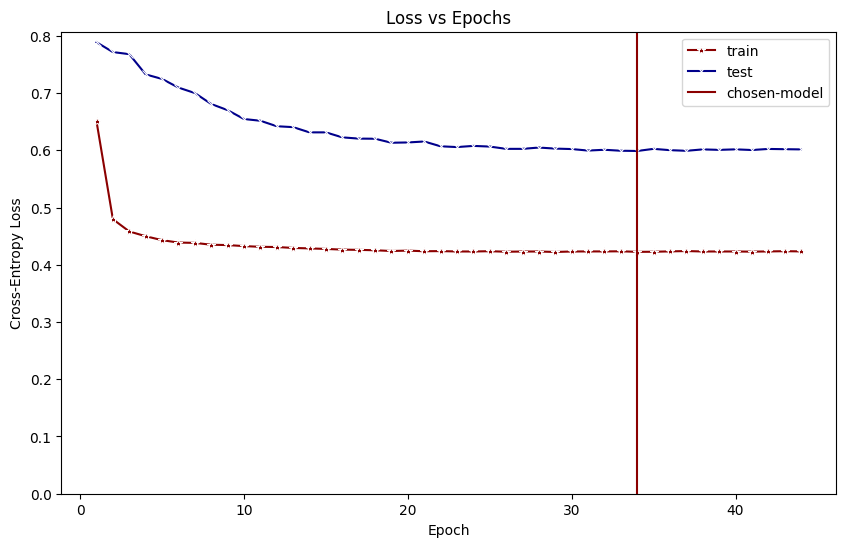


<Test Report>
Precision: [no diabetes] 0.8424195837275308, [pre-diabetes] 0.0, [diabetes] 0.0
Recall: [no diabetes] 1.0, [pre-diabetes] 0.0, [diabetes] 0.0
F1-Score: [no diabetes] 0.9144709393754613, [pre-diabetes] 0.0, [diabetes] 0.0
Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
Accuracy: 84.2420%
Macro-F1: 0.3048


/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
# generate lookup for models
models = {
    # "tree": TreeClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True),
    "ffnn": MLPClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=False, loss_balance=False),
    # "log": LogClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True)
}

# manual search
# models["tree"].set_hyperparams({
#     "loss": "log_loss",
#     "learning_rate": 0.01,
#     "n_estimators": 100,
#     "criterion": "friedman_mse",
#     "min_samples_split": 5,
#     "min_samples_leaf": 5,
#     "max_depth": 8,
#     "n_iter_no_change": 5,
#     "max_features": "sqrt",
#     "tol": 0.0001
# })
# models["ffnn"].set_hyperparams({
#     "learning_rate": .0005,
#     "batch_size": 256,
#     "num_hidden": 8,
#     "hidden_size": [2048, 1024, 512, 256, 128, 64, 32, 32],
#     "num_epochs": 50,
#     "dropout_rate": [0.875, 0.75, 0.75, 0.5, 0.5, 0.25, 0.25],
#     "classify_fn": "sigmoid"
# })
# models["ffnn"].set_hyperparams({
#     "learning_rate": .001,
#     "batch_size": 32,
#     "num_hidden": 4,
#     "hidden_size": [128, 64, 64, 32],
#     "num_epochs": 50,
#     "dropout_rate": [0.5, 0.4, 0.3, 0.2],
#     "classify_fn": "sigmoid"
# # })
models["ffnn"].set_hyperparams({
    "input_size": 21,
    "output_size": 3,
    "hidden_size": 1024,
    "num_hidden": 4,
    "num_epochs": 50,
    "batch_size": 64,
    "learning_rate": 5e-05,
    "dropout_rate": 0.9,
    "classify_fn": "sigmoid"
})
# models["ffnn"].set_hyperparams({
#     "input_size": 21,
#     "output_size": 3,
#     "hidden_size": 512,
#     "num_hidden": 2,
#     "num_epochs": 50,
#     "batch_size": 128,
#     "dropout_rate": 0.4,
#     "learning_rate": 0.0005
# })

# train & test basic model
skip_models = ["ffnn"]#["ffnn", "log"]
for mt, model in models.items():
    # attempt to load, else train and test
    if mt in skip_models or not model.load_model():
        model.train_model(verbose=2)
    model.test_model()

***
## Hyperparameter Optimization

In [3]:
# optimize hyperparams
# optimizer_results = {model_type: model.optimize_hyperparams(kfold=2) for model_type, model in models.items()}
# print(optimizer_results)

***
## Fine-Tuning + Other Adjustments

***
## Best Model Report

In [4]:
model["ffnn"].explain_model()

TypeError: 'MLPClassifier' object is not subscriptable

***
## Interpretation

***
## Conclusion